<a href="https://colab.research.google.com/github/paulesting/Data-Science-pratical-Tasks-and-Solutions-first-commit/blob/main/Data_Analysis_of_Unemployment_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unraveling the Challenges of Unemployment in Africa: A Data-Driven Approach

## 10Alytics Global Hackathon 2023

## by Damilola Esan

## Introduction

>Unemployment poses a significant challenge to the socio-economic fabric of African nations, requiring a nuanced understanding of its root causes and effective, implementable solutions. This data analysis project aims to unravel the complex layers of unemployment in Africa, leveraging insights from six diverse datasets. The objective is to equip analysts and policymakers with data-driven recommendations that can catalyze informed strategies, contributing to the alleviation of unemployment on the continent.

### Objectives:

- Uncover the multi-faceted nature of unemployment in Africa, recognizing its socio-economic, educational, and policy-related dimensions.
- Analyze key factors influencing high unemployment rates, ranging from gender-based disparities to national strategies for youth employment, education expenditure, access to electricity, and the historical health of the private sector.
- Propose solutions and strategies grounded in data insights, tailored to the unique challenges faced by African nations. Emphasize creativity, analytical rigor, and practicality in developing implementable recommendations.
- Utilize data visualization techniques to draw meaningful correlations, providing a visual narrative of unemployment trends, disparities, and potential intervention points.

>By combining analytical rigor with creativity, I see this project as a catalyst for positive change, offering practical and evidence-based solutions to mitigate the unemployment crisis in Africa. The insights derived from this analysis hold the potential to shape policies, influence educational strategies, and foster economic development, ultimately contributing to a more prosperous and employed future for the continent.

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the datasets into a dataframe
unemployment_rate = pd.read_csv('1. unemployment-rate-men-vs-women.csv')
youth_employment = pd.read_csv('2. national-strategy-for-youth-employment.csv')
edu_expenditure = pd.read_csv('3. share-of-education-in-government-expenditure.csv')
electricity_access = pd.read_csv('4. share-of-the-population-with-access-to-electricity.csv')
total_firms = pd.read_excel('5. Total_firms_Historical_data.xlsx')
country_codes = pd.read_csv('6. Country Codes.csv')

## Prelimenary Wrangling

### Initial Exploration

In [ ]:
# Quick overview of unemployment rate
unemployment_rate.sample(5)

,Entity,Code,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),Continent
5818,Benin,BEN,1872,NaN,NaN,943878.0,NaN
46144,Seychelles,SYC,1868,NaN,NaN,15385.0,NaN
12078,Croatia,HRV,800,NaN,NaN,407176.0,NaN
19553,Germany,DEU,2013,4.919,5.499,81680592.0,NaN
46233,Seychelles,SYC,1957,NaN,NaN,40966.0,NaN


In [ ]:
# Quick overview of youth employment
youth_employment.sample(5)

,Entity,Code,Year,"8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP"
86,Costa Rica,CRI,2022,1
243,Nicaragua,NIC,2022,1
142,Greece,GRC,2022,3
311,Spain,ESP,2021,3
354,Vietnam,VNM,2021,2


In [ ]:
# Quick overview of education expenditure
edu_expenditure.sample(5)

,Entity,Code,Year,"Government expenditure on education, total (% of government expenditure)"
3687,Syria,SYR,2007,18.925930
2516,Moldova,MDA,2003,16.192590
2964,Paraguay,PRY,2007,19.424720
480,Brazil,BRA,2019,15.958080
1240,European Union (27),NaN,2007,11.555855


In [ ]:
# Quick overview of electricity access
electricity_access.sample(5)

,Entity,Code,Year,Access to electricity (% of population)
3509,Malta,MLT,2013,100.000000
2116,Ghana,GHA,2001,44.837513
1508,Dominica,DMA,2010,94.173940
2775,Italy,ITA,2014,100.000000
4594,Qatar,QAT,1995,100.000000


In [ ]:
# Quick overview of the total firms
total_firms.sample(5)

,Economy,Adult population,Year,TOTAL Number of \nLimited Liability Companies,Total business density rate
576,Ireland,3096398.0,2011.0,181055.0,58.472780
148,Belgium,7282454.0,2013.0,512195.0,70.332748
859,Mexico,71989500.0,2009.0,358583.0,4.981046
370,"Egypt, Arab Rep.",61125132.0,2019.0,52056.0,0.851630
520,Hungary,6826448.0,2012.0,405077.0,59.339352


In [ ]:
# Quick overview of country codes
country_codes.sample(5)

,name,alpha-2,alpha-3,country-code,region,sub-region
196,Senegal,SN,SEN,686,Africa,Sub-Saharan Africa
98,Holy See,VA,VAT,336,Europe,Southern Europe
56,Cuba,CU,CUB,192,Americas,Latin America and the Caribbean
129,Lithuania,LT,LTU,440,Europe,Northern Europe
172,Papua New Guinea,PG,PNG,598,Oceania,Melanesia


In [ ]:
# Renaming columns for better clarity and usage
unemployment_rate = unemployment_rate.rename(columns={
    'Unemployment, female (% of female labor force) (modeled ILO estimate)': 'Female unemployment rate(%)',
    'Unemployment, male (% of male labor force) (modeled ILO estimate)': 'Male unemployment rate(%)',
    'Population (historical estimates)': 'Population',
})

youth_employment = youth_employment.rename(columns={
    '8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP': 'Youth employment strategy'
})

edu_expenditure = edu_expenditure.rename(columns={
    'Government expenditure on education, total (% of government expenditure)': 'Education expenditure(%)',
})

electricity_access = electricity_access.rename(columns={
    'Access to electricity (% of population)': 'Electricity access(%)',
})

total_firms = total_firms.rename(columns={
    'TOTAL Number of \nLimited Liability Companies': 'Total LLC',
    'Total business density rate': 'Business density rate',
})

In [ ]:
# Details of the datasets
print(unemployment_rate.info(), '\n')
print(youth_employment.info(), '\n')
print(edu_expenditure.info(), '\n')
print(electricity_access.info(), '\n')
print(total_firms.info(), '\n')
print(country_codes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58578 entries, 0 to 58577
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       58578 non-null  object 
 1   Code                         55049 non-null  object 
 2   Year                         58578 non-null  int64  
 3   Female unemployment rate(%)  6231 non-null   float64
 4   Male unemployment rate(%)    6231 non-null   float64
 5   Population                   58252 non-null  float64
 6   Continent                    285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Entity                     363 non-null    object
 1   Code                       

In [ ]:
# Checking for duplicate entries in the unemployment rate
print("unemployment_rate:", unemployment_rate.duplicated().sum(), '\n')
print("youth_employment:", youth_employment.duplicated().sum(),'\n')
print("edu_expenditure:", edu_expenditure.duplicated().sum(),'\n')
print("electricity_access:", electricity_access.duplicated().sum(),'\n')
print(" total_firms:", total_firms.duplicated().sum(),'\n')
print("country_codes:", country_codes.duplicated().sum())

unemployment_rate: 0 

youth_employment: 0 

edu_expenditure: 0 

electricity_access: 0 

 total_firms: 0 

country_codes: 0


In [ ]:
# Checking for the null values in the datasets
print("unemployment_rate:\n", unemployment_rate.isna().sum(), '\n')
print("youth_employment:\n", youth_employment.isna().sum(),'\n')
print("edu_expenditure:\n", edu_expenditure.isna().sum(),'\n')
print("electricity_access:\n", electricity_access.isna().sum(),'\n')
print(" total_firms:\n", total_firms.isna().sum(),'\n')
print("country_codes:\n", country_codes.isna().sum())

unemployment_rate:
 Entity                             0
Code                            3529
Year                               0
Female unemployment rate(%)    52347
Male unemployment rate(%)      52347
Population                       326
Continent                      58293
dtype: int64 

youth_employment:
 Entity                       0
Code                         0
Year                         0
Youth employment strategy    0
dtype: int64 

edu_expenditure:
 Entity                        0
Code                        295
Year                          0
Education expenditure(%)      0
dtype: int64 

electricity_access:
 Entity                     0
Code                     370
Year                       0
Electricity access(%)      0
dtype: int64 

 total_firms:
 Economy                  1
Adult population         4
Year                     4
Total LLC                4
Business density rate    4
dtype: int64 

country_codes:
 name            0
alpha-2         1
alpha-3         0


In [ ]:
# Descriptive statistics of the datasets
print("unemployment_rate:\n", unemployment_rate.describe(), '\n')
print("youth_employment:\n", youth_employment.describe(),'\n')
print("edu_expenditure:\n", edu_expenditure.describe(),'\n')
print("electricity_access:\n", electricity_access.describe(),'\n')
print(" total_firms:\n", total_firms.describe(),'\n')
print("country_codes:\n", country_codes.describe())

unemployment_rate:
                Year  Female unemployment rate(%)  Male unemployment rate(%)  \
count  58578.000000                  6231.000000                6231.000000   
mean    1603.516542                     9.460057                   7.567807   
std     1424.962569                     7.613245                   5.688615   
min   -10000.000000                     0.149000                   0.052000   
25%     1832.000000                     4.052500                   3.612000   
50%     1901.000000                     6.908000                   5.890000   
75%     1966.000000                    12.771000                  10.037500   
max     2021.000000                    47.183000                  36.963000   

         Population  
count  5.825200e+04  
mean   4.901082e+07  
std    2.925549e+08  
min    0.000000e+00  
25%    1.460840e+05  
50%    1.388504e+06  
75%    6.600998e+06  
max    7.909295e+09   

youth_employment:
               Year  Youth employment strategy
cou

## Data Quality Issues

### Unemployment Rate:

- **Missing Data:** Columns Code, Female unemployment rate(%), Male unemployment rate(%), Population, and Continent have missing values.
- **Inconsistent Year Values:** The Year column has a minimum value of -10,000, which seems inconsistent and may be an error.

---

### Youth Employment:

- **No Apparent Issues:** This dataset appears to have minimal data quality issues. No missing values are reported.

---

### Education Expenditure:

- **Missing Data:** Column Code has missing values.
- **Unrealistic Minimum Education Expenditure:** The minimum value for Education expenditure(%) is 0, which might be unrealistic.

---

### Electricity Access:

- **Missing Data:** Column Code has missing values.

---

### Total Firms:

- **Inconsistent Year Values:** The Year column has a minimum value of 2006, which might not align with the other datasets.
- **Missing Data:** Columns Economy, Adult population, Year, Total LLC, and Business density rate have missing values.

---

### Country Codes:

- **Missing Data:** Columns alpha-2, region, and sub-region have missing values.
- **Incomplete Country Code Information:** The alpha-2 column has one missing value, and region and sub-region also have one missing value each.


### Investigating these findings

In [ ]:
# Investigating negative values in "Year" column of unemployment rate
unemployment_rate[unemployment_rate['Year'] < 0]

,Entity,Code,Year,Female unemployment rate(%),Male unemployment rate(%),Population,Continent
32,Afghanistan,AFG,-10000,NaN,NaN,14737.0,NaN
33,Afghanistan,AFG,-9000,NaN,NaN,20405.0,NaN
34,Afghanistan,AFG,-8000,NaN,NaN,28253.0,NaN
35,Afghanistan,AFG,-7000,NaN,NaN,39120.0,NaN
36,Afghanistan,AFG,-6000,NaN,NaN,54166.0,NaN
...,...,...,...,...,...,...,...
58355,Zimbabwe,ZWE,-5000,NaN,NaN,5692.0,NaN
58356,Zimbabwe,ZWE,-4000,NaN,NaN,8538.0,NaN
58357,Zimbabwe,ZWE,-3000,NaN,NaN,12807.0,NaN
58358,Zimbabwe,ZWE,-2000,NaN,NaN,19211.0,NaN


In [ ]:
# Investigating outliers in "Female unemployment rate(%)" and "Male unemployment rate(%)" where they are lesser than 1
outliers_female = unemployment_rate[unemployment_rate['Female unemployment rate(%)'] < 1]
outliers_male = unemployment_rate[unemployment_rate['Male unemployment rate(%)'] < 1]
print("Outliers in 'Female unemployment rate(%)':\n", outliers_female)
print("Outliers in 'Male unemployment rate(%)':\n", outliers_male)

Outliers in 'Female unemployment rate(%)':
              Entity Code  Year  Female unemployment rate(%)  \
3608     Azerbaijan  AZE  1991                        0.964   
4901        Belarus  BLR  1991                        0.502   
5678          Benin  BEN  1991                        0.590   
5679          Benin  BEN  1992                        0.580   
5680          Benin  BEN  1993                        0.561   
...             ...  ...   ...                          ...   
53243  Turkmenistan  TKM  1993                        0.985   
54060        Uganda  UGA  1991                        0.573   
54061        Uganda  UGA  1992                        0.654   
56975       Vietnam  VNM  2011                        0.901   
56976       Vietnam  VNM  2012                        0.931   

       Male unemployment rate(%)  Population Continent  
3608                       0.839   7538266.0       NaN  
4901                       0.693  10457619.0       NaN  
5678                       2

In [ ]:
# Investigating rows with Population = 0 in unemployment rate
unemployment_rate[unemployment_rate['Population'] == 0]

,Entity,Code,Year,Female unemployment rate(%),Male unemployment rate(%),Population,Continent
1746,Anguilla,AIA,-10000,NaN,NaN,0.0,NaN
1747,Anguilla,AIA,-9000,NaN,NaN,0.0,NaN
1748,Anguilla,AIA,-8000,NaN,NaN,0.0,NaN
2648,Aruba,ABW,400,NaN,NaN,0.0,NaN
2649,Aruba,ABW,500,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...
55389,United States Virgin Islands,VIR,400,NaN,NaN,0.0,NaN
57297,Western Sahara,ESH,-3000,NaN,NaN,0.0,NaN
57298,Western Sahara,ESH,-2000,NaN,NaN,0.0,NaN
57299,Western Sahara,ESH,-1000,NaN,NaN,0.0,NaN


In [ ]:
# Investigating rows with "Education expenditure(%)" = 0
edu_expenditure[edu_expenditure['Education expenditure(%)'] == 0]

,Entity,Code,Year,Education expenditure(%)
2730,Nicaragua,NIC,1982,0.0
2731,Nicaragua,NIC,1984,0.0
2732,Nicaragua,NIC,1987,0.0


In [ ]:
# Investigating rows with "Electricity access(%)" < 1
electricity_access[electricity_access['Electricity access(%)'] < 1]

,Entity,Code,Year,Electricity access(%)
5291,South Sudan,SSD,2006,0.643132
5784,Uganda,UGA,1994,0.533899


In [ ]:
# Investigating missing values in total firms
total_firms[total_firms['Year'].isnull()]

,Economy,Adult population,Year,Total LLC,Business density rate
1522,NaN,NaN,NaN,NaN,NaN
1523,* This economy was included in the Eurostat Li...,NaN,NaN,NaN,NaN
1524,"** For Canada, only the data for Quebec and On...",NaN,NaN,NaN,NaN
1525,"***For China, only the data for Beijing and Sh...",NaN,NaN,NaN,NaN


In [ ]:
# Investigating missing values in "alpha-2", "alpha-3" "region," and "sub-region" columns of country codes
missing_alpha2 = country_codes[country_codes['alpha-2'].isnull()]
missing_region = country_codes[country_codes['region'].isnull()]
missing_subregion = country_codes[country_codes['sub-region'].isnull()]

print("Rows with missing 'alpha-2' values:\n", missing_alpha2,'\n')
print("Rows with missing 'region' values:\n", missing_region,'\n')
print("Rows with missing 'sub-region' values:\n", missing_subregion,'\n')

Rows with missing 'alpha-2' values:
         name alpha-2 alpha-3  country-code  region          sub-region
153  Namibia     NaN     NAM           516  Africa  Sub-Saharan Africa 

Rows with missing 'region' values:
          name alpha-2 alpha-3  country-code region sub-region
8  Antarctica      AQ     ATA            10    NaN        NaN 

Rows with missing 'sub-region' values:
          name alpha-2 alpha-3  country-code region sub-region
8  Antarctica      AQ     ATA            10    NaN        NaN 



In [ ]:
# Investigating null values in 'Code' column for Education Expenditure
edu_expenditure[edu_expenditure['Code'].isnull()].sample(10)

,Entity,Code,Year,Education expenditure(%)
2812,North America (WB),NaN,2017,13.017705
2482,Middle East and North Africa (WB),NaN,2014,11.917440
3580,Sub-Saharan Africa (WB),NaN,2000,15.607160
1591,High-income countries,NaN,2007,12.328560
3982,Upper-middle-income countries,NaN,2014,13.799330
2480,Middle East and North Africa (WB),NaN,2012,11.615544
2072,Latin America and Caribbean (WB),NaN,2020,15.336860
2814,North America (WB),NaN,2019,12.559245
3968,Upper-middle-income countries,NaN,2000,16.226150
2474,Middle East and North Africa (WB),NaN,2005,13.854110


In [ ]:
# Investigating null values in 'Code' column for Electricity Access
electricity_access[electricity_access['Code'].isnull()].sample(10)

,Entity,Code,Year,Electricity access(%)
1848,European Union (27),NaN,2011,100.000000
5365,Sub-Saharan Africa (WB),NaN,2003,29.544962
3259,Low-income countries,NaN,2009,24.620592
3054,Latin America and Caribbean (WB),NaN,1995,88.599500
3058,Latin America and Caribbean (WB),NaN,1999,91.247590
1841,European Union (27),NaN,2004,100.000000
1878,Faeroe Islands,NaN,2010,100.000000
1821,Europe and Central Asia (WB),NaN,2015,99.256310
3682,Middle-income countries,NaN,2020,94.045770
1798,Europe and Central Asia (WB),NaN,1992,100.000000



### Results of Further Investigations:

**Unemployment Rate**

- The continent column contains mostly null values
- Rows with negative and error years in the Year column are associated with null values in both the Female unemployment rate(%) and Male unemployment rate(%) columns. These rows can be considered errors, and it's suggested to drop them.
- Rows with missing or zero values in the Population column are also related to the same set of rows where unemployment rates for both genders are null.

**Youth Employment**

- Youth employment strategy contains integer values

**Education Expenditure**

- Instances where the expenditure is 0, specifically for Nicaragua in 1982, 1984, and 1987, have been confirmed as correct after verifying external sources, such as [macrotrends.net](https://www.macrotrends.net/countries/NIC/nicaragua/education-spending).
- Rows where code are nulls contain expenditures for regions and income categores

**Electricity Access**

- Instances where electricity access values are less than 0 have been confirmed as correct after checking external sources, such as [macrotrends.net](https://www.macrotrends.net/countries/UGA/uganda/electricity-access-statistics).
- Rows where code are nulls contain access for regions and income categores

**Total firms**

- Null values in the dataset indicate that the corresponding values in the Economy column are not actual countries but rather random text. These rows should be dropped.

**Country Codes**

- Row with missing 'alpha-2' and 'alpha-3' value is Namibia and can be filled in.
- Row with missing 'region' and 'sub-region' values are particularly for Antarctica, which can be filled in accordingly.

These findings provide guidance on specific actions that can be taken to improve the quality and reliability of the datasets. It involves dropping erroneous rows, validating certain values, and addressing missing or incorrect data.


## Data Cleaning Process

In preparation for our analysis, we will undertake a comprehensive data cleaning process to ensure the quality and reliability of our datasets. Below are the key steps taken:

**Drop Null Rows in Unemployment Rate:**
- Remove rows with null values in the 'Female unemployment rate(%)' and 'Male unemployment rate(%)' columns.

**Fill Missing Values in Country Codes Dataset:**

- Fill missing 'alpha-2' and 'alpha-3' for Namibia with values from [codesofcountry.com](https://https://codesofcountry.com/namibia-264-na#:~:text=The%20ISO%203166-1%20numeric%20code%20for%20Namibia%20is,ISO%203166-1%20Alpha-3%20or%20three-letter%20code%20is%20NAM.).
- Fill missing 'region' and 'sub-region' for Antarctica.

**Fill Continent Column in Unemployment Rate:**

- Map the 'region' column from the Country Codes dataset to the 'Continent' column in the Unemployment Rate dataset.
- Change 'Oceania' to 'Australia' in the 'Continent' column.
- Separate 'Americas' into 'North America' and 'South America' based on the 'sub-region' in the Country Codes dataset.

**Drop Rows with Null Values in Total Firms:**

- Remove rows with null values in the 'Total LLC' column.

**Replace Integer Values Values in Youth Employment**

- Replace the integer values to Categorical values

This streamlined process addresses the specific actions outlined, including filling missing values, mapping continents, and dropping null rows.


In [ ]:
# Step 1: Dropping Null Rows in Unemployment Rate
unemployment_rate.dropna(subset=['Female unemployment rate(%)', 'Male unemployment rate(%)'], inplace=True)

In [ ]:
# Step 2: Filling Missing Values in Country Codes Dataset
country_codes.loc[country_codes['name'] == 'Namibia', ['alpha-2', 'alpha-3']] = ['NA', 'NAM']
country_codes.loc[country_codes['name'] == 'Antarctica', ['region', 'sub-region']] = ['Antarctica', 'Antarctica']

In [ ]:
# Step 3: Filling Continent Column in Unemployment Rate
unemployment_rate['Continent'] = unemployment_rate['Code'].map(
    country_codes.set_index('alpha-3')['region']
)

# Replace 'Oceania' with 'Australia' in the Continent column
unemployment_rate['Continent'] = unemployment_rate['Continent'].replace('Oceania', 'Australia')

# Separate 'Americas' into 'North America' and 'South America'
north_america = country_codes.loc[country_codes['sub-region'] == 'Northern America', 'alpha-3'].tolist()
south_america = country_codes.loc[country_codes['sub-region'] == 'Latin America and the Caribbean', 'alpha-3'].tolist()

unemployment_rate.loc[unemployment_rate['Code'].isin(north_america), 'Continent'] = 'North America'
unemployment_rate.loc[unemployment_rate['Code'].isin(south_america), 'Continent'] = 'South America'


In [ ]:
# Step 4: Dropping Rows with Null Values in Total Firms
total_firms.dropna(subset=['Total LLC'], inplace=True)

In [ ]:
# Step 5: Replacing Integer Values Values in Youth Employment
strategy_mapping = {
    0: 'No Strategy',
    1: 'Developing a Strategy',
    2: 'Strategy Adopted',
    3: 'Strategy Operationalized'
}

# Replace integer values with categorical values
youth_employment['Youth employment strategy'] = youth_employment['Youth employment strategy'].map(strategy_mapping)

In [ ]:
# Merging the datasets
common_columns = ['Entity', 'Year']

merged_df = pd.merge(unemployment_rate, youth_employment, on=common_columns, how='left', suffixes=('_unemployment', '_youth_employment'))
merged_df = pd.merge(merged_df, edu_expenditure, on=common_columns, how='left', suffixes=('_unemployment2', '_edu_expenditure'))
merged_df = pd.merge(merged_df, electricity_access, on=common_columns, how='left', suffixes=('_unemployment3', '_electricity_access'))
merged_df = pd.merge(merged_df, total_firms, left_on=['Entity', 'Year'], right_on=['Economy', 'Year'], how='left', suffixes=('_unemployment4', '_total_firms'))
merged_df = pd.merge(merged_df, country_codes, left_on='Entity', right_on='name', how='left', suffixes=('_unemployment5', '_country_codes'))

# Drop redundant columns
merged_df.drop(['Economy', 'name'], axis=1, inplace=True)

In [ ]:
# Dropping redundant columns
redundant_columns = ['Code_youth_employment', 'Code_unemployment3', 'Code_electricity_access']
merged_df.drop(redundant_columns, axis=1, inplace=True)

# Renaming the columns
column_mapping = {
    'Code_unemployment': 'Code',
    'Female unemployment rate(%)': 'Female_Unemployment_%',
    'Male unemployment rate(%)': 'Male_Unemployment_%',
    'Youth employment strategy': 'Youth_Strategy',
    'Education expenditure(%)': 'Edu_Expenditure_%',
    'Electricity access(%)': 'Electricity_Access_%',
    'Adult population': 'Adult_Population',
    'Total LLC': 'Total_LLC',
    'Business density rate': 'Business_Density',
    'alpha-2': 'Alpha2',
    'alpha-3': 'Alpha3',
    'country-code': 'Country_Code',
    'region': 'Region',
    'sub-region': 'Sub_Region'
}

merged_df.rename(columns=column_mapping, inplace=True)

In [ ]:
# Saving cleaned datasets
unemployment_rate.to_csv('cleaned_unemployment_rate.csv', index=False)
country_codes.to_csv('cleaned_country_codes.csv', index=False)
total_firms.to_csv('cleaned_total_firms.csv', index=False)
youth_employment.to_csv('cleaned_youth_employment.csv', index=False)
merged_df.to_csv('merged_df.csv', index=False)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6231 entries, 0 to 6230
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 6231 non-null   object 
 1   Code                   5828 non-null   object 
 2   Year                   6231 non-null   int64  
 3   Female_Unemployment_%  6231 non-null   float64
 4   Male_Unemployment_%    6231 non-null   float64
 5   Population             5952 non-null   float64
 6   Continent              5766 non-null   object 
 7   Youth_Strategy         278 non-null    object 
 8   Edu_Expenditure_%      3626 non-null   float64
 9   Electricity_Access_%   5326 non-null   float64
 10  Adult_Population       1238 non-null   float64
 11  Total_LLC              1238 non-null   float64
 12  Business_Density       1238 non-null   float64
 13  Alpha2                 5146 non-null   object 
 14  Alpha3                 5146 non-null   object 
 15  Coun

## Exploratory Data Analysis (Africa)

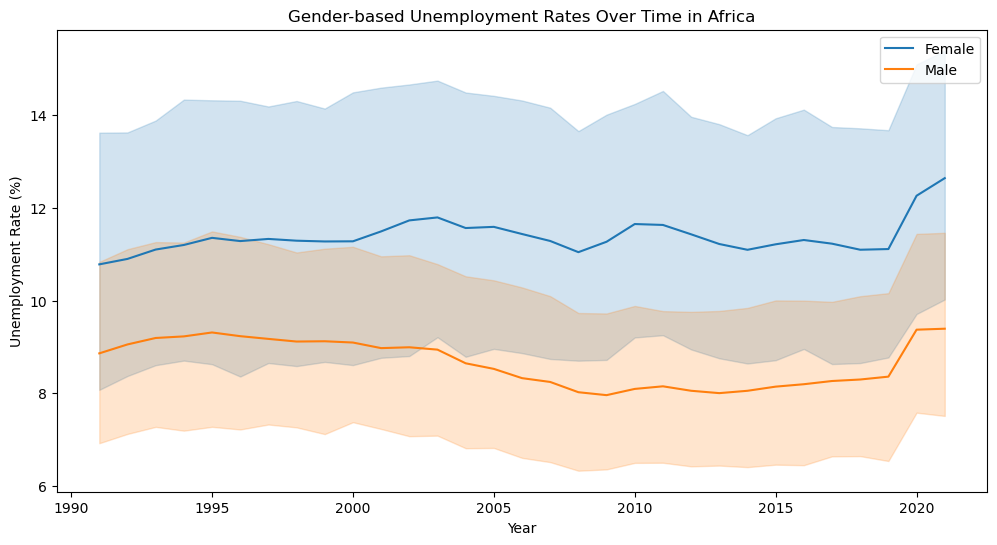

In [ ]:
# Visualizing gender-based unemployment rates over time in Africa
africa_df = merged_df[merged_df['Continent'] == 'Africa']

plt.figure(figsize=(12, 6))
sns.lineplot(data=africa_df, x='Year', y='Female_Unemployment_%', label='Female')
sns.lineplot(data=africa_df, x='Year', y='Male_Unemployment_%', label='Male')
plt.title('Gender-based Unemployment Rates Over Time in Africa')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

This chart depicts gender-based unemployment rates in Africa from 1991 to 2021, it is evident that both female and male unemployment rates have experienced similar patterns over the years. Notably, female unemployment rates consistently surpass those of males, highlighting a persistent gender disparity in the job market. The data also reveals some yearly fluctuations in both genders, with spikes in unemployment rates observed between 2019 and 2021. The latter year, 2020, stands out as particularly impactful, showing a substantial increase in unemployment rates for both females and males, likely attributable to the global challenges posed by the COVID-19 pandemic. Despite these fluctuations, the general trend suggests a persistent gender gap in unemployment rates, underscoring the need for targeted interventions to address and mitigate this inequality in the African job market.

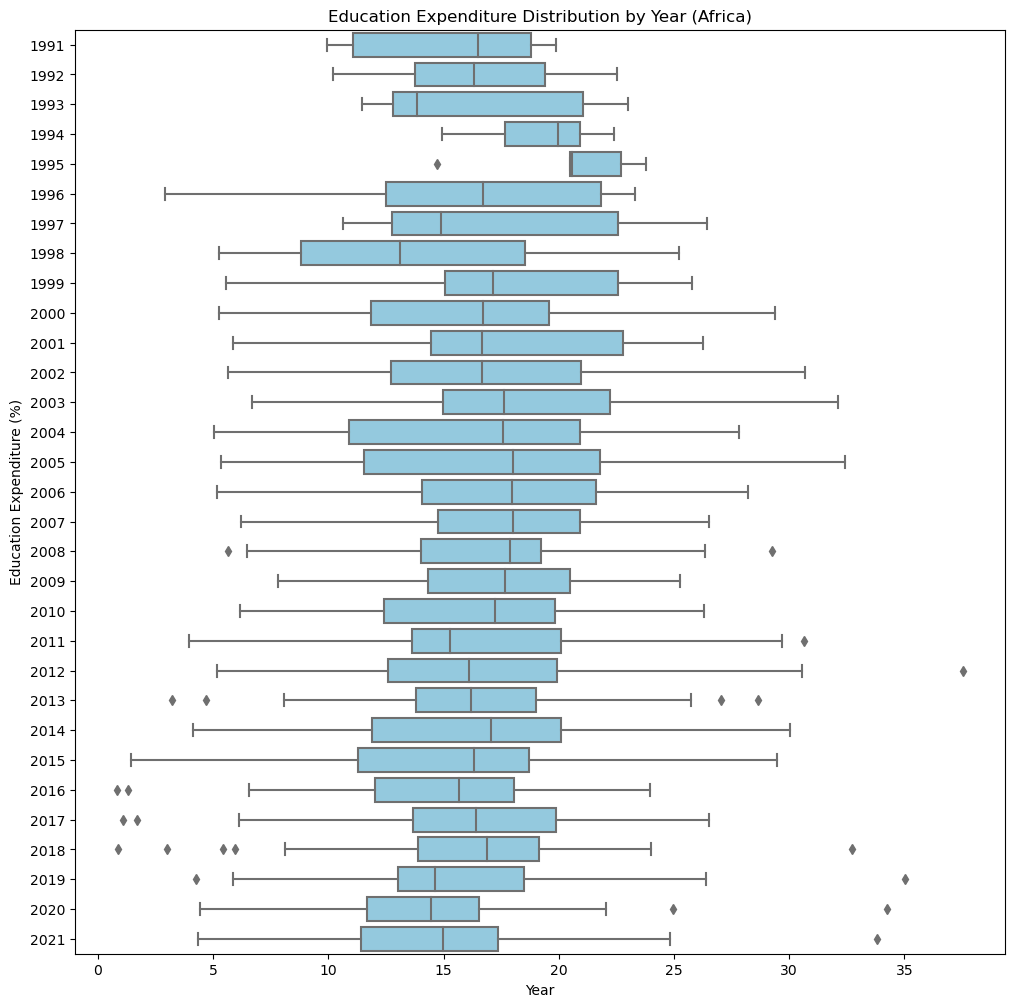

In [ ]:
# Visualizing a Box plot of Education Expenditure by Year in Africa
plt.figure(figsize=(12, 12))
sns.boxplot(data=africa_df, y='Year', x='Edu_Expenditure_%', orient='h', color='skyblue')
plt.title('Education Expenditure Distribution by Year (Africa)')
plt.xlabel('Year')
plt.ylabel('Education Expenditure (%)')
plt.show()

It is apparent that the mean percentage of education expenditure fluctuates over the years, demonstrating a diverse financial commitment to education. Notably, certain years stand out with higher mean values, indicative of potential increased investment in education during those periods. The data also reveals considerable variability in expenditure each year, with some years displaying more consistent spending patterns than others. Outliers in specific years suggest instances of exceptionally high education spending. Interestingly, the mean expenditure percentages have shown a slight decrease in the most recent years, possibly signaling a shift in financial priorities or challenges in sustaining higher education investments. This comprehensive overview provides valuable insights into the dynamic nature of education expenditure in Africa, emphasizing the need for continued attention and strategic planning to ensure consistent and adequate funding for education initiatives.

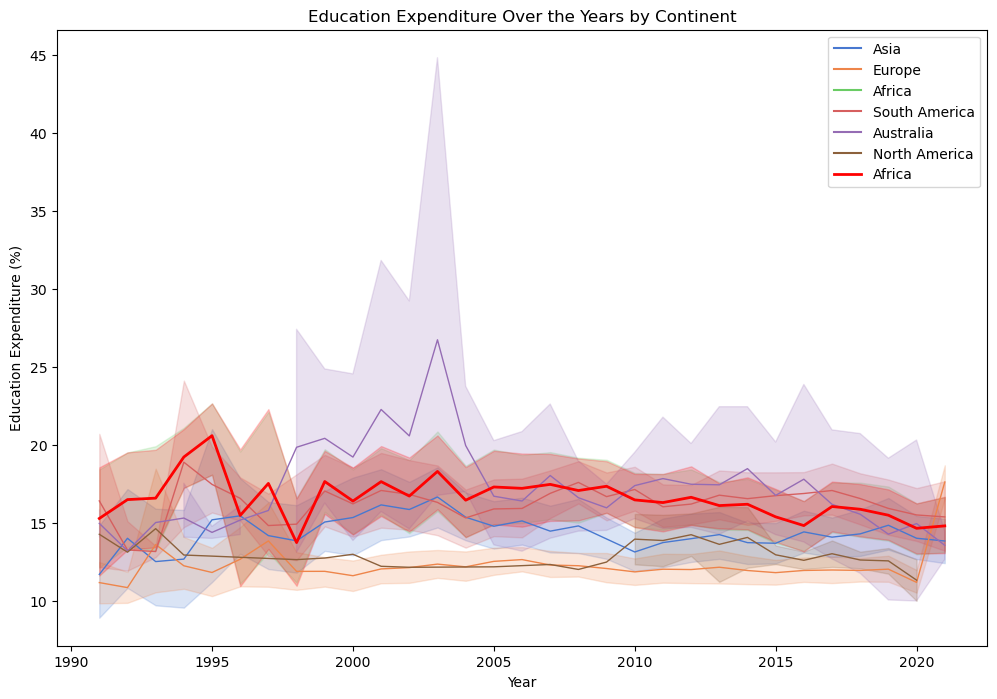

In [ ]:
# Visualizing a line plot of Education Expenditure over the years by Continent
custom_palette = sns.color_palette("muted")
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Edu_Expenditure_%', hue='Continent', data=merged_df, linewidth=1, palette=custom_palette)
sns.lineplot(x='Year', y='Edu_Expenditure_%', color='red', label='Africa', data=africa_df, linewidth=2)
plt.title('Education Expenditure Over the Years by Continent')
plt.xlabel('Year')
plt.ylabel('Education Expenditure (%)')
plt.legend()
plt.show()

This line plot illustrating education expenditure over the years by continent offers a comprehensive perspective on global investment trends in education. Analyzing the chart, it is evident that Africa consistently maintains higher average education expenditure percentages compared to other continents. The red line specifically representing Africa stands out prominently, showcasing a gradual increase in education spending from the early 1990s to the mid-2000s, followed by a period of relatively stable investment. In contrast, other continents such as Asia and Europe exhibit more fluctuating patterns, with occasional peaks and troughs in education expenditure. North America displays a comparatively steady trend, while South America experiences a noticeable upward trajectory in recent years. The chart underscores the diverse approaches and priorities of different continents in allocating resources to education. Africa's sustained commitment reflects a concerted effort to prioritize education, potentially addressing critical developmental needs or rather the culture of corruption that the budgeted expenditure are not utilized. The variations across continents highlight the complex interplay of economic, social, and political factors influencing education funding decisions.

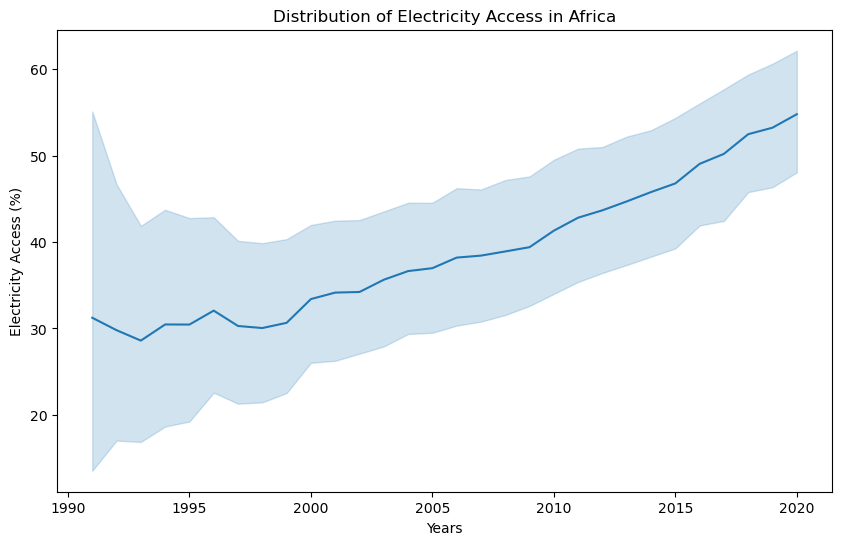

In [ ]:
# Visualizing Distribution of Electricity Access in Africa
plt.figure(figsize=(10, 6))
sns.lineplot(data=africa_df, y='Electricity_Access_%', x='Year')
plt.title('Distribution of Electricity Access in Africa')
plt.ylabel('Electricity Access (%)')
plt.xlabel('Years')
plt.show()

This reveals a consistent upward trend in the percentage of the population with access to electricity. The data spans from 1991 to 2020, showing a gradual increase in electricity access. The visualization effectively captures the improvement in access over time. The mean values, ranging from 31% in 1991 to 55% in 2020, indicate a substantial overall growth in electrification. However, it's essential to note the variability in access rates, as seen in the narrowing interquartile ranges. The absence of data for 2021 underscores the need for updated information. The chart conveys a positive narrative of progress in electricity access across Africa, highlighting the strides made over the past three decades.

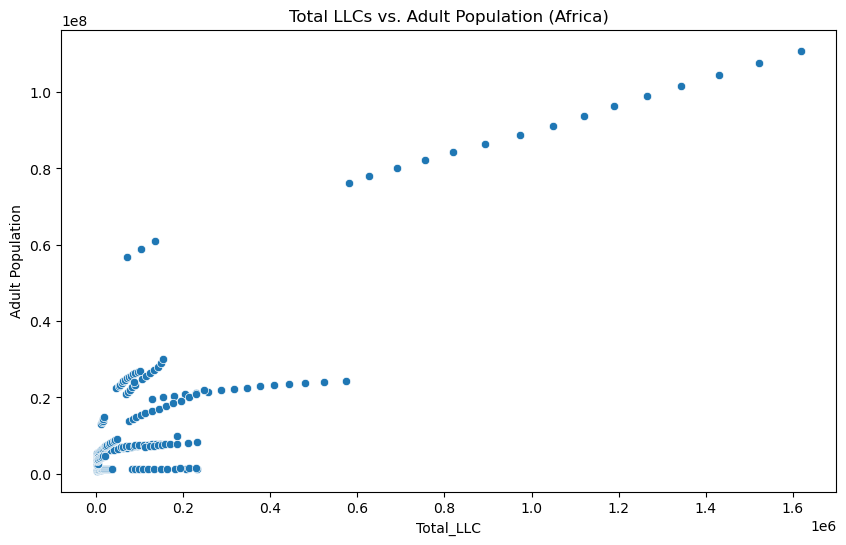

In [ ]:
# Visualizing Total_LLC vs. Adult Population in Africa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_LLC', y='Adult_Population', data=africa_df)
plt.title('Total LLCs vs. Adult Population (Africa)')
plt.xlabel('Total_LLC')
plt.ylabel('Adult Population')
plt.show()

We can observe a positive correlation between the total limited liablity companies and the adult population in Africa. As the number of businesses increases, there appears to be a general trend of higher adult populations in those regions. The scatter plot reveals a wide range of LLCs, ranging from lower values with corresponding smaller adult populations to higher values associated with larger adult populations. However, it's important to note that there is still considerable variability within the total LLCs, emphasizing the diverse demographic landscape across the continent.

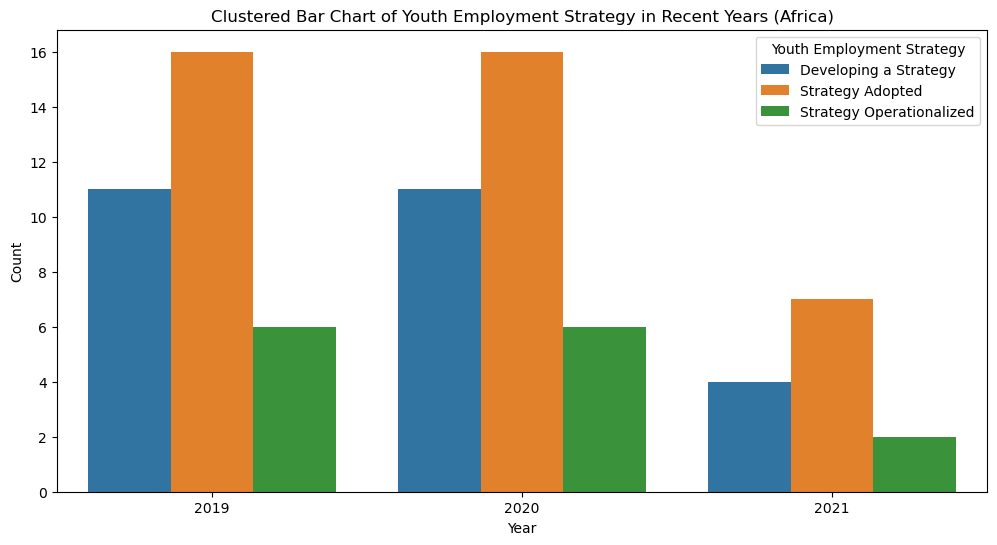

In [ ]:
# Visualizing youth employment strategy in Africa over the years
strategy = africa_df.groupby(['Year', 'Youth_Strategy']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', hue='Youth_Strategy', data=strategy)
plt.title('Clustered Bar Chart of Youth Employment Strategy in Recent Years (Africa)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Youth Employment Strategy')
plt.show()

In 2019 and 2020, there was a consistent pattern with 11 instances of strategy development, 16 instances of strategy adoption, and 6 instances of strategy operationalization. However, in 2021, the numbers decreased, signaling a potential shift in the approach to youth employment. Specifically, there were 4 instances of strategy development, 7 instances of strategy adoption, and only 2 instances of strategy operationalization. This visual representation allows for a quick comparison of the evolution of youth employment strategies over the years, indicating variations in emphasis or priorities. It suggests that  there was a notable decrease in all strategies in the most recent year, possibly warranting further investigation into the underlying factors contributing to this trend.

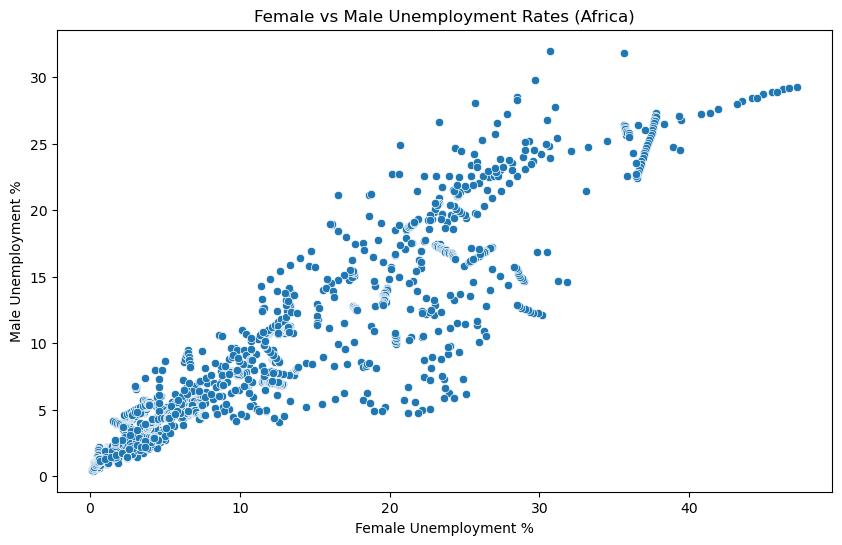

In [ ]:
# Visualizing male and female uemployment rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Female_Unemployment_%', y='Male_Unemployment_%', data=africa_df)
plt.title('Female vs Male Unemployment Rates (Africa)')
plt.xlabel('Female Unemployment %')
plt.ylabel('Male Unemployment %')
plt.show()

Examining the scatter plot of female versus male unemployment rates provides a visual snapshot of the employment landscape in Africa. The data points suggest a nuanced relationship between female and male unemployment, revealing a tendency for higher female unemployment rates across the spectrum. The spread of data points, extending from the lower left to the upper right, signifies a diverse range of unemployment scenarios across different regions or time periods. Notably, the scatter plot highlights instances of disproportionately high female unemployment rates, reaching up to about 50%, underscoring the importance of targeted interventions to address gender-specific employment challenges. In essence, this visualization prompts a closer examination of the factors contributing to gender disparities in unemployment and emphasizes the need for region-specific policy considerations.

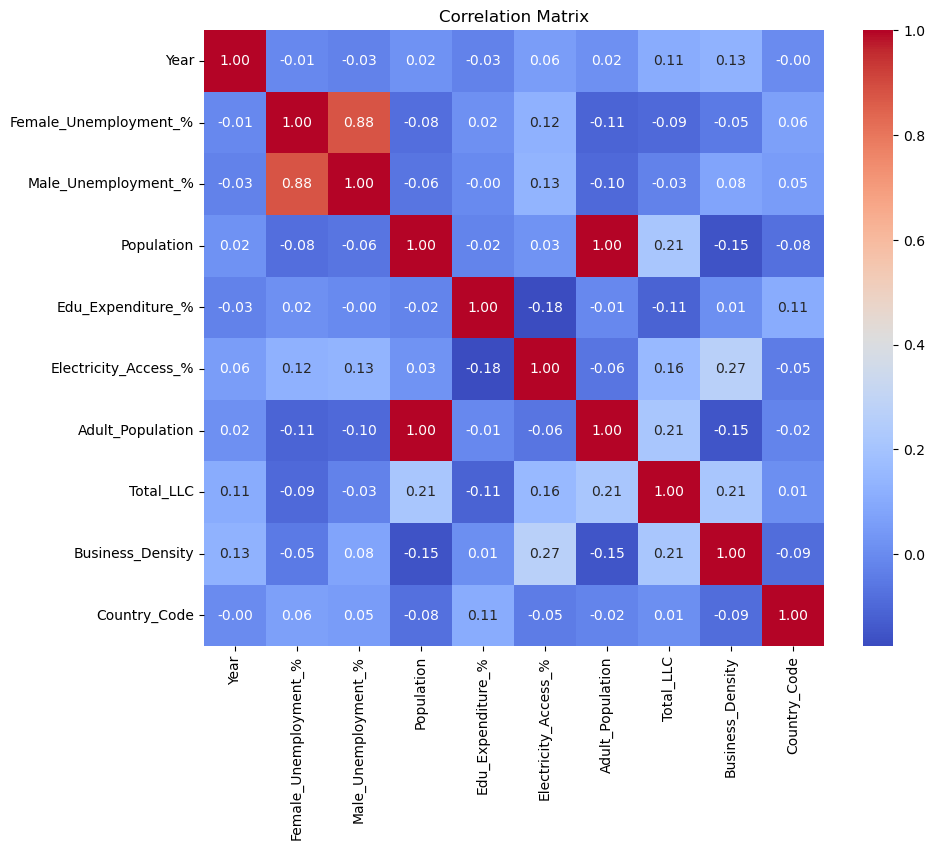

In [ ]:
# Visualizing a Heatmap of Correlation Matrix for Unemployment Rate in Africa
numeric_columns = africa_df.select_dtypes(include=['float64', 'int64']).columns
numeric = merged_df[numeric_columns]

correlation_matrix = numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides a comprehensive overview of the relationships among various economic indicators in Africa. Notably, the correlation coefficients reveal interesting patterns. The positive correlation between female and male unemployment percentages (0.88) suggests a strong relationship, indicating that regions with higher female unemployment tend to experience higher male unemployment as well. The correlation between education expenditure and electricity access is negative (-0.18), suggesting that regions with higher education expenditure might have lower electricity access. Also, there is a positive correlation between business density and electricity access (0.27), implying that areas with better electricity access tend to have a higher density of businesses. The high positive correlation (0.21) between adult population and total limited liability companies suggests that regions with a larger adult population may also exhibit a higher density of businesses. This correlation underscores the potential economic opportunities associated with a larger adult workforce.

## Explanatory Data Analysis (Africa)

In [ ]:
# Countries with Top 5 and Least 5 unemployment rates
average_unemployment = africa_df.groupby('Entity')[['Female_Unemployment_%', 'Male_Unemployment_%']].mean()

top_5_female = average_unemployment.nlargest(5, 'Female_Unemployment_%')
least_5_female = average_unemployment.nsmallest(5, 'Female_Unemployment_%')

top_5_male = average_unemployment.loc[top_5_female.index, 'Male_Unemployment_%']
least_5_male = average_unemployment.loc[least_5_female.index, 'Male_Unemployment_%']

print("Top 5 Female Unemployment Rates:")
print(top_5_female['Female_Unemployment_%'])
print("\nTop 5 Male Unemployment Rates:")
print(top_5_male)
print("\nLeast 5 Female Unemployment Rates:")
print(least_5_female['Female_Unemployment_%'])
print("\nLeast 5 Male Unemployment Rates:")
print(least_5_male)

Top 5 Female Unemployment Rates:
Entity
Djibouti        37.281548
Lesotho         35.324452
South Africa    32.754806
Eswatini        26.765419
Libya           25.875903
Name: Female_Unemployment_%, dtype: float64

Top 5 Male Unemployment Rates:
Entity
Djibouti        24.829935
Lesotho         25.776129
South Africa    24.938903
Eswatini        22.235903
Libya           16.479903
Name: Male_Unemployment_%, dtype: float64

Least 5 Female Unemployment Rates:
Entity
Chad       0.561645
Rwanda     0.832452
Niger      1.171387
Benin      1.179129
Burundi    1.220032
Name: Female_Unemployment_%, dtype: float64

Least 5 Male Unemployment Rates:
Entity
Chad       1.243258
Rwanda     1.002774
Niger      1.547645
Benin      1.458742
Burundi    2.007000
Name: Male_Unemployment_%, dtype: float64


Top 10 Countries with the Most Improvement in Education Expenditure:
Entity
South Sudan                     100.408409
Somalia                          23.761546
Zimbabwe                         17.255107
Democratic Republic of Congo     10.910666
Sao Tome and Principe             8.322488
Congo                             7.361825
Gambia                            6.732649
Liberia                           6.621574
Zambia                            6.560657
Sierra Leone                      4.946332
dtype: float64


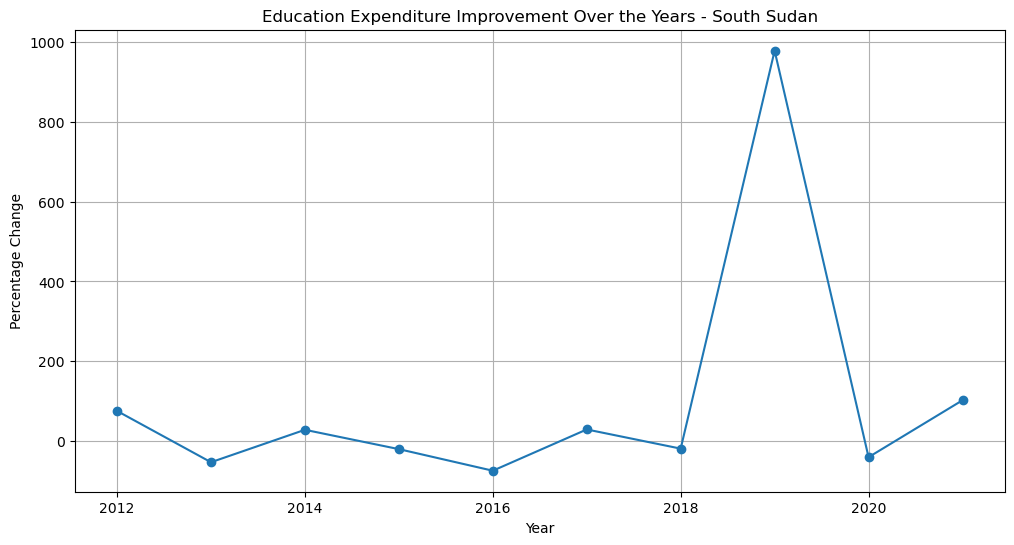

In [ ]:
# Displaying the top 10 countries that have improved the most in education expenditure
data = africa_df[['Entity', 'Year', 'Edu_Expenditure_%']]
pivot_table = data.pivot(index='Entity', columns='Year', values='Edu_Expenditure_%')
pct_change = pivot_table.pct_change(axis=1) * 100
mean_pct_change = pct_change.mean(axis=1)
improved = mean_pct_change.sort_values(ascending=False)
top_countries = improved.head(10)

print("Top 10 Countries with the Most Improvement in Education Expenditure:")
print(top_countries)

# Visualizing the improvement for the top country
top_country = top_countries.index[0]
plt.figure(figsize=(12, 6))
plt.plot(pct_change.loc[top_country], marker='o')
plt.title(f'Education Expenditure Improvement Over the Years - {top_country}')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

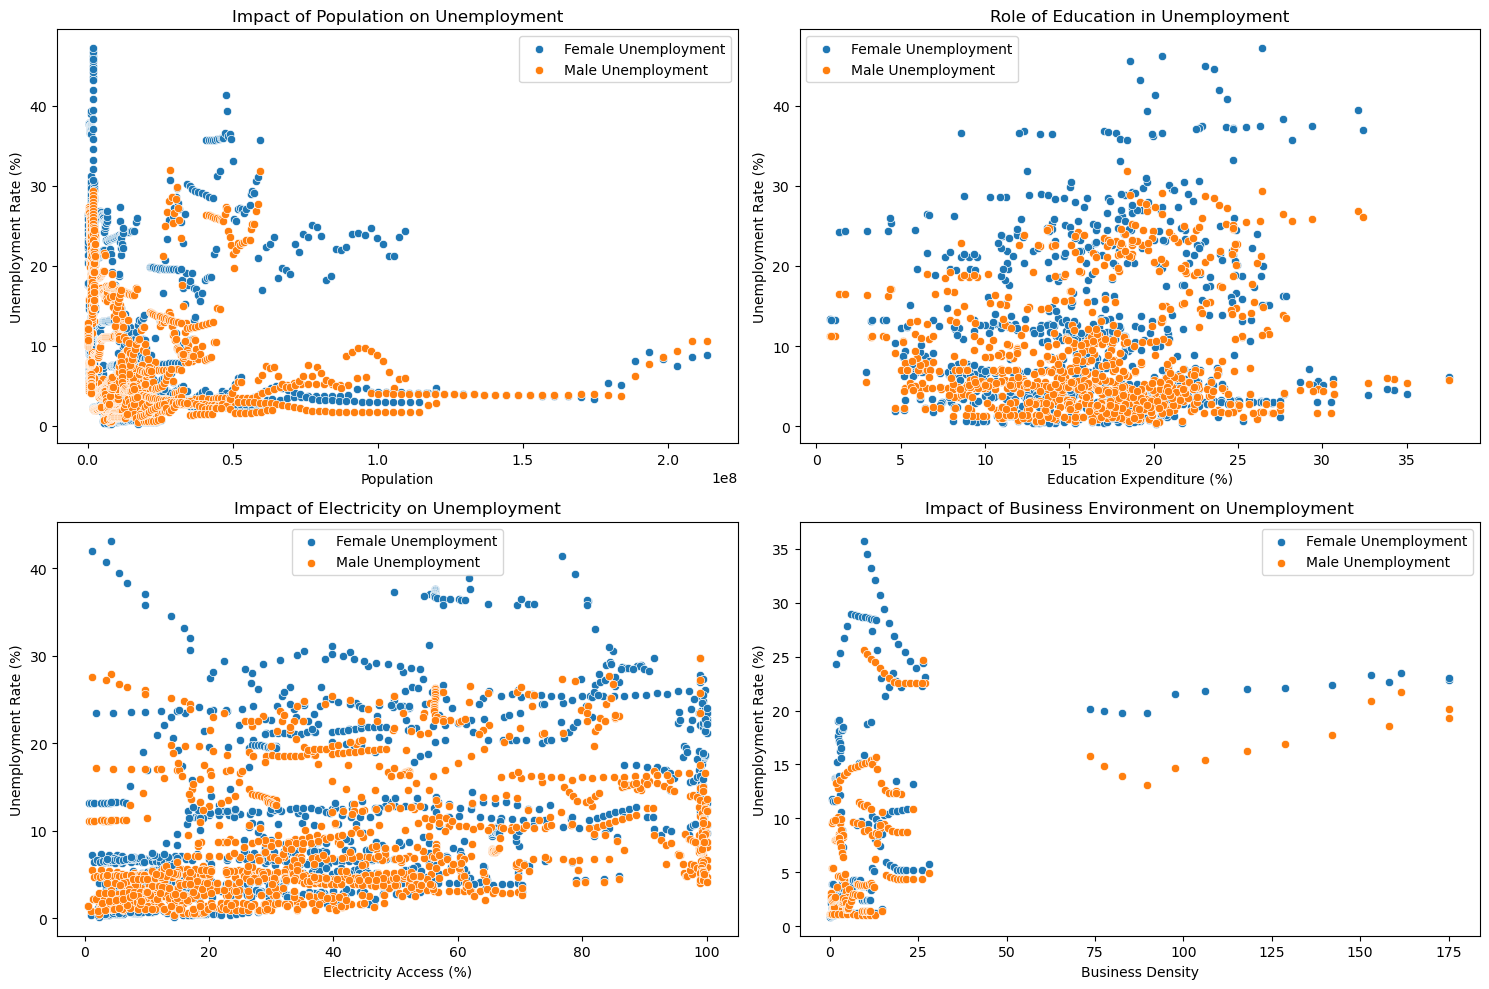

In [ ]:
# Visualizing the impact of specific features on the unemployment rate
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Population Impact
sns.scatterplot(x='Population', y='Female_Unemployment_%', data=africa_df, label='Female Unemployment', ax=axes[0, 0])
sns.scatterplot(x='Population', y='Male_Unemployment_%', data=africa_df, label='Male Unemployment', ax=axes[0, 0])
axes[0, 0].set_xlabel('Population')
axes[0, 0].set_ylabel('Unemployment Rate (%)')
axes[0, 0].set_title('Impact of Population on Unemployment')
axes[0, 0].legend()

# Role of Education
sns.scatterplot(x='Edu_Expenditure_%', y='Female_Unemployment_%', data=africa_df, label='Female Unemployment', ax=axes[0, 1])
sns.scatterplot(x='Edu_Expenditure_%', y='Male_Unemployment_%', data=africa_df, label='Male Unemployment', ax=axes[0, 1])
axes[0, 1].set_xlabel('Education Expenditure (%)')
axes[0, 1].set_ylabel('Unemployment Rate (%)')
axes[0, 1].set_title('Role of Education in Unemployment')
axes[0, 1].legend()

# Infrastructure and Unemployment
sns.scatterplot(x='Electricity_Access_%', y='Female_Unemployment_%', data=africa_df, label='Female Unemployment', ax=axes[1, 0])
sns.scatterplot(x='Electricity_Access_%', y='Male_Unemployment_%', data=africa_df, label='Male Unemployment', ax=axes[1, 0])
axes[1, 0].set_xlabel('Electricity Access (%)')
axes[1, 0].set_ylabel('Unemployment Rate (%)')
axes[1, 0].set_title('Impact of Electricity on Unemployment')
axes[1, 0].legend()

# Business Environment
sns.scatterplot(x='Business_Density', y='Female_Unemployment_%', data=africa_df, label='Female Unemployment', ax=axes[1, 1])
sns.scatterplot(x='Business_Density', y='Male_Unemployment_%', data=africa_df, label='Male Unemployment', ax=axes[1, 1])
axes[1, 1].set_xlabel('Business Density')
axes[1, 1].set_ylabel('Unemployment Rate (%)')
axes[1, 1].set_title('Impact of Business Environment on Unemployment')
axes[1, 1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Population Impact:
Both genders exhibit a wide range of unemployment rates across different population sizes. However, there seems to be a slightly higher concentration of points with higher female unemployment rates in regions with smaller populations. This suggests that the relationship between population size and female unemployment might differ from that of males, indicating potential gender-specific dynamics in employment outcomes.

Role of Education:
It appears that there is no distinct pattern. The points are dispersed, and no discernible correlation is evident. Despite varying levels of education spending, both female and male unemployment rates exhibit a wide range, indicating that additional factors influence employment outcomes.

Electricity Access:
There is a subtle observation here. There might be a slight trend suggesting that regions with higher electricity access tend to have lower unemployment rates for both genders. However, the points are scattered, and the relationship is not strong, indicating that other factors contribute to the complexity of the employment landscape.

Business Environment:
The points are also dispersed with no clear trend. While there seems to be a concentration of points at lower business densities, it doesn't necessarily translate into higher unemployment rates. The diversity in business density across regions suggests that factors beyond business concentration influence employment outcomes.

In summary, the scatter plots visually convey the complexity of the relationships between these factors and unemployment rates. No straightforward patterns emerge, highlighting the multifaceted nature of employment dynamics in Africa. Policymakers may need to consider a combination of factors and regional nuances when formulating strategies to address unemployment challenges.

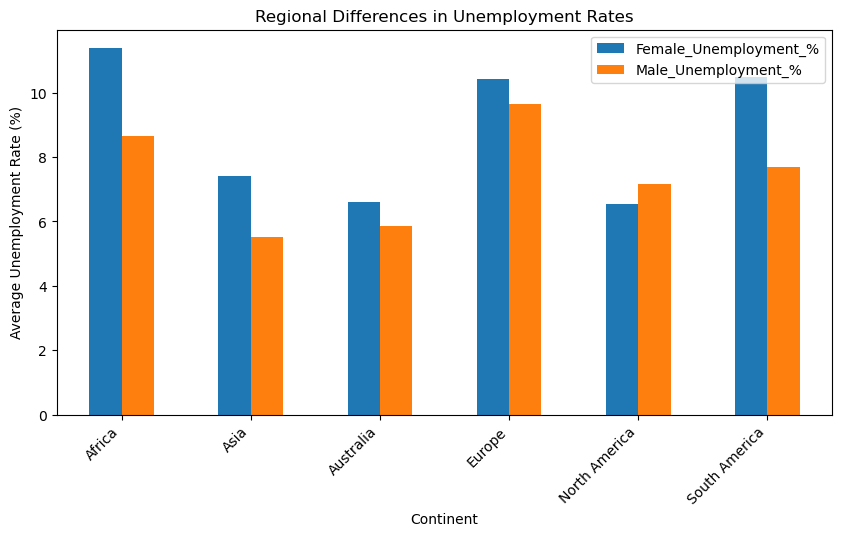

In [ ]:
# Visualizing the Regional Differences across continents
region_avg = merged_df.groupby('Continent')[['Female_Unemployment_%', 'Male_Unemployment_%']].mean()
region_avg.plot(kind='bar', figsize=(10,5))
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Regional Differences in Unemployment Rates')
plt.xticks(rotation=45, ha='right')
plt.show()

The chart illustrates distinct regional differences in unemployment rates across continents, differentiating between male and female unemployment percentages across continents. In Africa, the data reveals a higher female unemployment rate at 11% compared to the male rate of 8%. Asia exhibits lower overall unemployment rates, with females at 7% and males at 6%. Also, Australia demonstrates relatively low unemployment rates for both genders. Europe exhibits higher unemployment rates overall, with females at 10% and males at 9%. North America showcases a slightly higher male unemployment rate of 7%, compared to males at 6.5%. In South America, the data indicates a noticeable gender disparity just like in Africa, with females experiencing a higher unemployment rate. These insights highlight the importance of considering regional variations when examining unemployment trends.

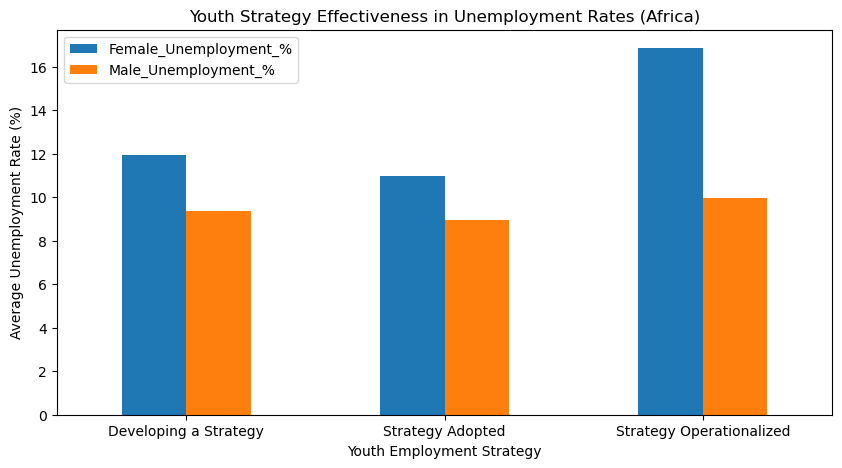

In [ ]:
# Visualizing the Youth Strategy Effectiveness in Africa
youth_strategy_avg = africa_df.groupby('Youth_Strategy')[['Female_Unemployment_%', 'Male_Unemployment_%']].mean()
youth_strategy_avg.plot(kind='bar', figsize=(10,5))
plt.xlabel('Youth Employment Strategy')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Youth Strategy Effectiveness in Unemployment Rates (Africa)')
plt.xticks(rotation=0, ha='center')
plt.show()

When focusing on developing a strategy, the data suggests that females face a higher unemployment rate than males. As strategies are adopted, both genders witness a decrease in unemployment rates. However, the operationalization of these strategies appears to introduce a notable gender gap, particularly for females, who experience a significant increase in unemployment at 16%, contrasting with the relatively stable male unemployment rate of 10%. This pattern implies that while the initial stages of strategy implementation may yield positive outcomes, there may be unforeseen challenges or disparities arising during the operationalization phase, especially for female job seekers. Therefore, a nuanced approach to youth employment strategies, considering both gender-specific needs and potential challenges at various implementation stages, is crucial for achieving sustainable and inclusive employment outcomes.

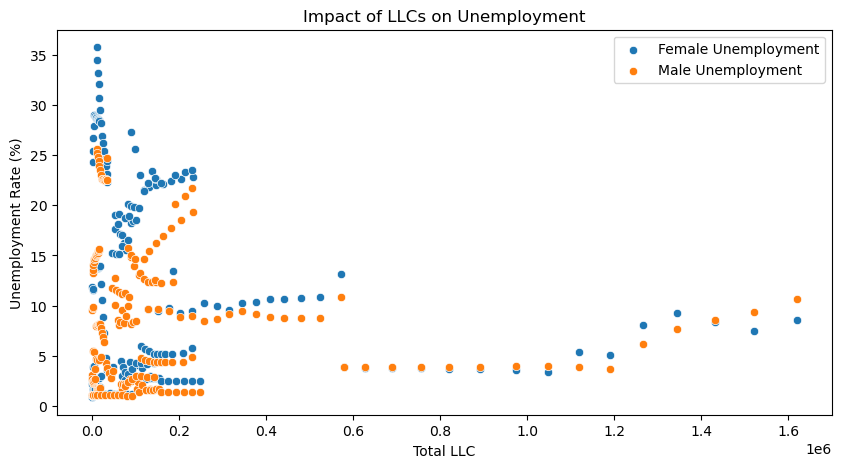

In [ ]:
# Visualizing impact of Limited Liability Companies (LLCs) on Unemployment
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Total_LLC', y='Female_Unemployment_%', data=africa_df, label='Female Unemployment')
sns.scatterplot(x='Total_LLC', y='Male_Unemployment_%', data=africa_df, label='Male Unemployment')
plt.xlabel('Total LLC')
plt.ylabel('Unemployment Rate (%)')
plt.title('Impact of LLCs on Unemployment')
plt.legend()
plt.show()

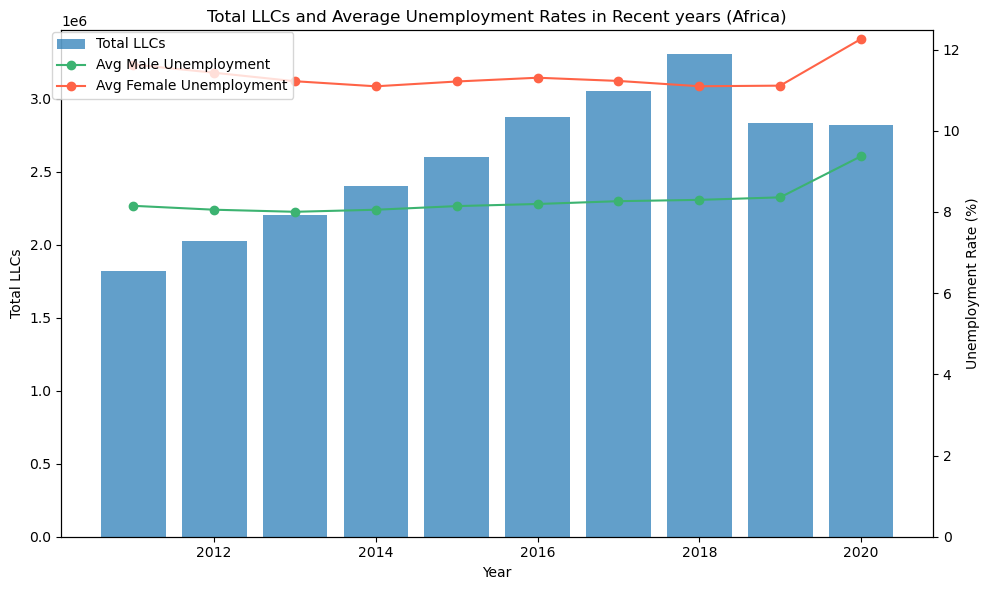

In [ ]:
# Visualizing impact of Limited Liability Companies (LLCs) on Unemployment
max_year = africa_df['Year'].max()
recent_years = africa_df[(africa_df['Year'] >= max_year - 10) & (africa_df['Year'] < max_year)]
total_llcs = recent_years.groupby('Year')['Total_LLC'].sum()
avg_male = recent_years.groupby('Year')['Male_Unemployment_%'].mean()
avg_female = recent_years.groupby('Year')['Female_Unemployment_%'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(total_llcs.index, total_llcs, alpha=0.7, label='Total LLCs')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total LLCs')
ax1.tick_params('y')

ax2 = ax1.twinx()
ax2.plot(avg_male.index, avg_male, color='mediumseagreen', marker='o', label='Avg Male Unemployment')
ax2.plot(avg_female.index, avg_female, color='tomato', marker='o', label='Avg Female Unemployment')
ax2.set_ylabel('Unemployment Rate (%)', color='black')
ax2.set_ylim(0, ax2.get_ylim()[1])
ax2.tick_params('y', colors='black')

plt.title('Total LLCs and Average Unemployment Rates in Recent years (Africa)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.show()

The scatter plot didn't show a clear relationship but the combo chart effectively captures the dynamic relationship between the total number of Limited Liability Companies (LLCs) and the average unemployment rates, differentiating between male and female demographics across the years in Africa. The bar graph showcases the annual fluctuation in the total number of LLCs, revealing a general upward trend until 2018, followed by a slight decline in 2019 and 2020. This trend suggests a complex interplay between economic activities facilitated by LLCs and the labor market. The dual y-axis line plot further enriches the narrative by juxtaposing the average male and female unemployment rates over the same time span. Notably, both male and female unemployment rates exhibit relative stability from 2011 to 2018. However, a noticeable divergence occurs in 2019 and 2020 just around the same time there was a decrease in LLCs which might be attributed to the COVID pandemic and economic crises in those years. The integration of LLC data with unemployment rates provides a comprehensive overview, indicating potential correlations between business activities and workforce participation.

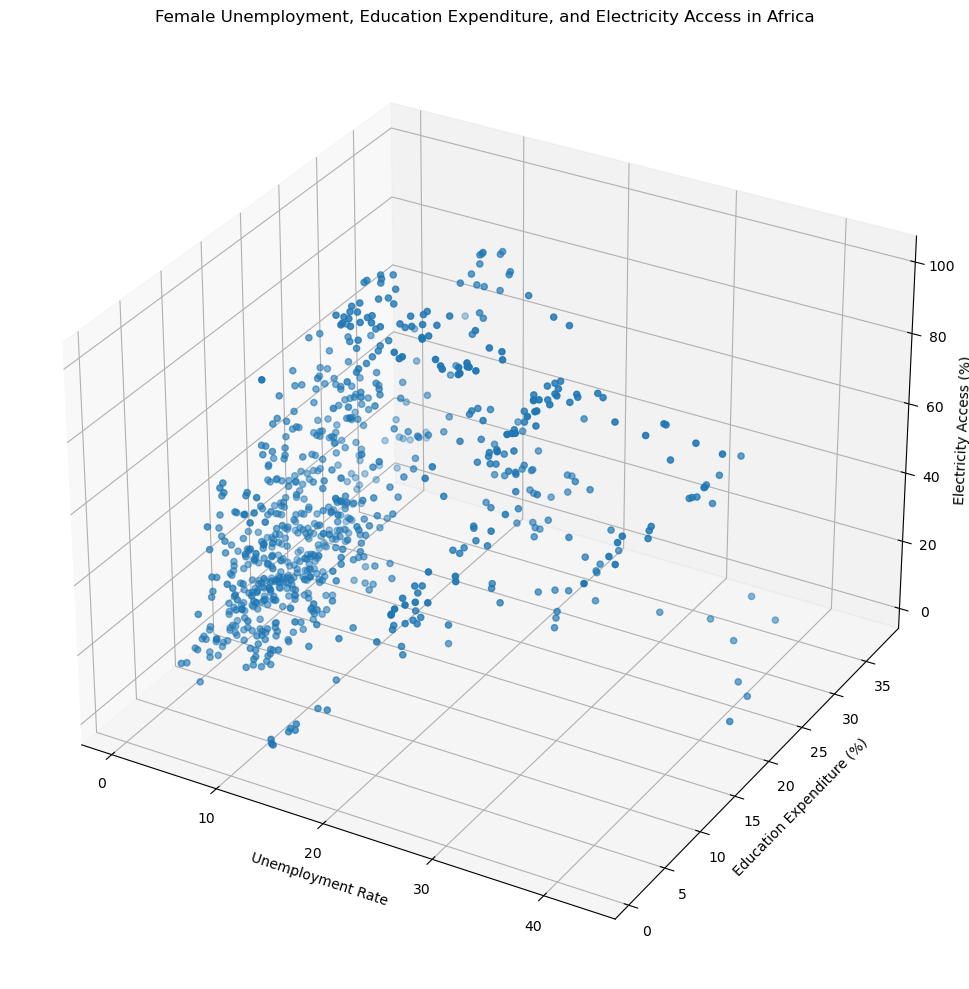

In [ ]:
# Visualizing impact of Limited Liability Companies (LLCs) on Unemployment
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = africa_df['Female_Unemployment_%']
y = africa_df['Edu_Expenditure_%']
z = africa_df['Electricity_Access_%']
ax.scatter(x, y, z)
ax.set_title('Female Unemployment, Education Expenditure, and Electricity Access in Africa')
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Education Expenditure (%)')
ax.set_zlabel('Electricity Access (%)')
plt.tight_layout()
plt.show()

The plot illustrates the variation in female unemployment rates, education expenditure, and electricity access. Female unemployment rates exhibit a diverse range, with some regions experiencing relatively low rates while others face more significant challenges, as indicated by the broad spread of data points along the x-axis. Education expenditure percentages show varying levels of investment in education, contributing to the overall dispersion in the plot. The z-axis, representing electricity access, highlights the disparities in infrastructure development across the continent, with regions showcasing both limited and robust access. The visualization provides an understanding of the multi-dimensional nature of socio-economic factors, emphasizing the need to address the specific challenges faced by different African countries.

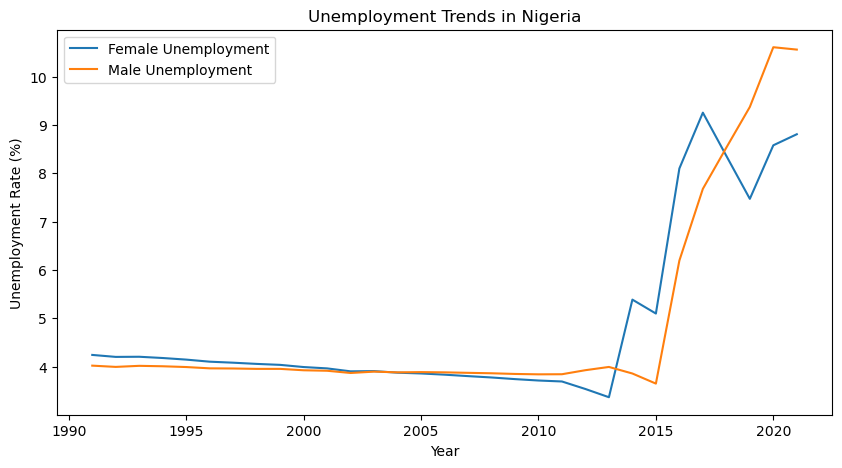

In [ ]:
# Visualizing Country-Specific Trend in Unemployment rate (Nigeria)
country_data = merged_df[merged_df['Entity'] == 'Nigeria']
plt.figure(figsize=(10,5))
plt.plot(country_data['Year'], country_data['Female_Unemployment_%'], label='Female Unemployment')
plt.plot(country_data['Year'], country_data['Male_Unemployment_%'], label='Male Unemployment')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Trends in Nigeria')
plt.legend()
plt.show()

The chart provides a compelling narrative of Nigeria's labor market dynamics. Throughout the early '90s and into the 2000s, both genders experienced a slight and gradual decline in unemployment rates, reflecting a period of relative stability and economic growth. However, around 2014, a noticeable spike in female unemployment occurred, reaching 5.5%, possibly indicating a shift in the employment landscape. In subsequent years, both male and female unemployment rates experienced fluctuations, with the female rate remaining consistently higher. The year 2016 marked a significant turning point, witnessing a substantial increase in female unemployment rates. This uptick persisted into 2017 and 2018, possibly indicating external factors impacting the labor market, such as economic downturns or policy changes.

The most recent data for 2020 and 2021 depicts a further rise in both female and male unemployment rates. These elevated rates may be attributed to global events, including the COVID-19 pandemic, which had widespread economic ramifications. In conclusion, the chart underscores the importance of continuous monitoring and analysis of unemployment trends to inform targeted interventions and policies aimed at stabilizing the labor market and fostering economic resilience. The observed gender disparities warrant focused attention, urging policymakers to address the unique challenges faced by women in the workforce.

# Insights from the Data Analysis
## Unemployment in Africa: A Data-Driven Perspective

### Insights:
**Gender Disparities in Unemployment:**
The analysis revealed persistent gender disparities in unemployment rates across Africa. Females consistently experienced higher unemployment rates compared to males. Understanding and addressing these gender-specific challenges is crucial for effective policy formulation.

**Yearly Fluctuations:**
Yearly fluctuations, particularly in 2019 and 2020, suggest external factors such as the global economic downturn and the COVID-19 pandemic impacting both genders.

**Youth Employment Strategies:**
The effectiveness of youth employment strategies varied. The "Strategy Operationalized" category showed a higher average unemployment rate, suggesting a need for reevaluation and potential adjustments in strategy implementation. Policymakers should focus on evidence-based strategies that yield positive outcomes.

**Education Expenditure Impact:**
While education expenditure showed diverse patterns over the years, recent data indicated a slight decrease in mean percentages, signaling potential shifts in investment priorities. A negative correlation was observed between education expenditure and unemployment rates, emphasizing the importance of investing in education. Increasing spending on education can enhance workforce skills, making individuals more employable and supporting economic growth.

**Infrastructure (Electricity):**
The percentage of the population with access to electricity demonstrated a consistent upward trend, reflecting positive progress in electrification across the continent. Increased access to electricity demonstrated a negative correlation with unemployment rates. Infrastructure development positively influences economic activities and job creation. Governments should prioritize infrastructure projects to stimulate economic growth.

**Business Density and Employment:**
The relationship between the total number of LLCs and unemployment rates exhibited complexities. The total number of LLCs showed an upward trend until 2018, followed by a slight decline in 2019 and 2020. The COVID-19 pandemic may have contributed to this trend. The positive correlation between business density and lower unemployment rates indicates the role of a vibrant business environment in job creation. Policies supporting entrepreneurship and creating a conducive business environment can contribute to reducing unemployment.

**Regional Disparities:**
Substantial variations in unemployment rates were observed across different continents. Policymakers should tailor interventions to address specific regional challenges and opportunities, acknowledging the diverse socio-economic landscapes.

### Recommendations:
**Gender-Inclusive Policies:**
Implement policies that specifically target reducing gender-based unemployment disparities. This may include initiatives to promote women's participation in the formal workforce, address discriminatory practices, and support women entrepreneurs.

**Optimizing Youth Employment Strategies:**
Evaluate and refine existing youth employment strategies to ensure they align with current socio-economic dynamics. Focus on the strategies operationalized and understand the negative effects it has on the female population.

**Boosting Education Expenditure:**
Increase investment in education, particularly in developing skills relevant to the job market. Consider exploring the reasons behind the recent decrease in mean education expenditure percentages and assess the potential impact on the quality of education. Collaboration between governments, private sectors, and educational institutions can enhance educational outcomes and reduce unemployment.

**Infrastructure Development:**
Strengthen infrastructure development initiatives to further improve electricity access. Access to reliable electricity is crucial for economic activities and can positively impact employment opportunities.

**Supporting LLCs and Small Businesses:**
Provide economic support and incentives for LLCs and small businesses, especially during challenging times such as economic downturns or crises. This can help stabilize the business environment and contribute to employment stability.

**Tailored Regional Interventions:**
Recognize and address region-specific challenges by tailoring interventions to the unique socio-economic conditions of each region. Collaborate with regional authorities and stakeholders to develop targeted solutions.

**Monitoring and Evaluation:**
Establish robust monitoring and evaluation mechanisms to continuously assess the impact of implemented policies. This iterative approach allows for adjustments based on real-time data and ensures the effectiveness of interventions.

**Further Investigation into Gender-Specific Trends:**
Conduct further in-depth analysis to understand the root causes of gender-specific trends in unemployment. Explore socio-cultural, economic, and policy factors that contribute to the observed disparities.

**Collaboration and Knowledge Sharing:**
Foster collaboration and knowledge sharing among African nations to share best practices and successful employment strategies. Regional collaboration can lead to collective solutions for common challenges.

*In conclusion, the insights derived from the data analysis provide a foundation for informed policy decisions. By addressing gender disparities, optimizing youth strategies, investing in education, and fostering a conducive business environment, African nations can work towards mitigating the challenges of unemployment and building a more inclusive and prosperous future.*

### Recommendations for Further Action:

1. **Detailed Urban vs. Rural Analysis:**
   - Investigate the urban-rural divide in electricity access to understand disparities and formulate targeted interventions.

2. **Industry-Specific Insights:**
   - Explore unemployment trends within specific industries to identify growth areas and areas needing additional support.

3. **Longitudinal Analysis:**
   - Conduct a longitudinal analysis to track the impact of implemented policies and strategies over time.

4. **Stakeholder Engagement:**
   - Engage with stakeholders, including governments, businesses, and educational institutions, to garner support for the proposed recommendations.

5. **Public Awareness Campaigns:**
   - Implement public awareness campaigns to highlight the importance of education and address social norms contributing to gender-based disparities in unemployment.

6. **Policy Impact Assessment:**
   - Regularly assess the impact of implemented policies on unemployment rates and make data-driven adjustments as needed.

*By taking these recommendations into consideration, policymakers and stakeholders can contribute to meaningful and sustainable solutions for mitigating unemployment challenges in Africa.*
